In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('Housing_Price_Data.csv')

In [81]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [83]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [84]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [85]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Renombrar columnas

In [87]:
#Identificar columnas de un solo valor
df.nunique()

Precio                     219
Area                       284
Habitaciones                 6
Baños                        4
Pisos                        4
CallePrincipal               2
HabitacionInvitados          2
Sotano                       2
CalefaccionAguaCaliente      2
AireAcondicionado            2
Estacionamiento              4
AreaPreferida                2
EstadoAmueblado              3
dtype: int64

In [88]:
#ver columnas de tipo numero
df.select_dtypes(include=[np.number]).columns
#calcular varianza de estas columnas
df.select_dtypes(include=[np.number]).var()

Precio             3.498544e+12
Area               4.709512e+06
Habitaciones       5.447383e-01
Baños              2.524757e-01
Pisos              7.525432e-01
Estacionamiento    7.423300e-01
dtype: float64

In [89]:
#Eliminar datos duplicados
df = df.drop_duplicates()

In [90]:
#Eliminar datos faltantes
df = df.dropna()

In [91]:
df.describe()

,Precio,Area,Habitaciones,Baños,Pisos,CallePrincipal,HabitacionInvitados,Sotano,CalefaccionAguaCaliente,AireAcondicionado,Estacionamiento,AreaPreferida,EstadoAmueblado
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


,Precio,Area,Habitaciones,Baños,Pisos,Estacionamiento
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [92]:
plt.title('Boxplots del precio')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.xticks(rotation=45)#graficar outliers
sns.boxplot(x=df['price'])

<Axes: title={'center': 'Boxplots del precio'}, xlabel='Precio', ylabel='Valores'>

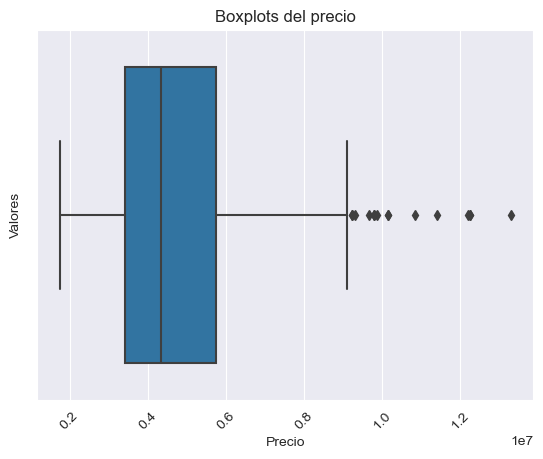

In [93]:
plt.title('Boxplots del area')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
sns.boxplot(x=df['area'])

<Axes: title={'center': 'Boxplots del area'}, xlabel='Area', ylabel='Valores'>

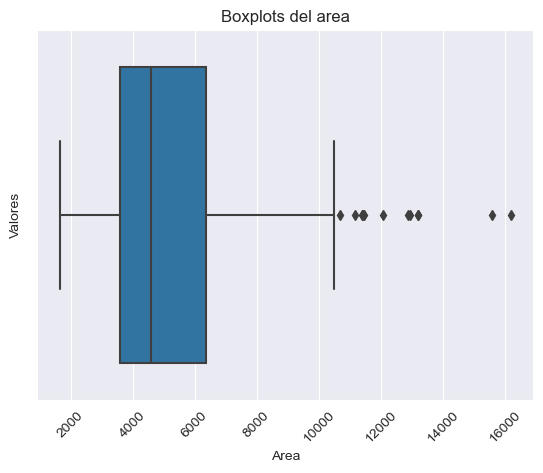

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['bedrooms', 'bathrooms', 'stories']])
plt.title('Boxplots de las columnas')
plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()